In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the path to the dataset
file_path = r'c:\Users\franc\Desktop\PhD\courses\AI Methods for Bioengineering Challenges\challenge\icu_challenge\Dataset_ICU_Barbieri_Mollura.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [3]:
# 1. Understand the dataset structure
print("--- First 5 rows ---")
print(df.head())

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Statistical Summary ---")
print(df.describe())

print("\n--- Shape of the dataset ---")
print(df.shape)

print("\n--- Column Names ---")
print(df.columns.tolist())

--- First 5 rows ---
   recordid  SAPS-I  SOFA  In-hospital_death   Age  Gender  Height  Weight  \
0    132539       6     1                  0  54.0     0.0     NaN     NaN   
1    132540      16     8                  0  76.0     1.0   175.3    76.0   
2    132541      21    11                  0  44.0     0.0     NaN    56.7   
3    132543       7     1                  0  68.0     1.0   180.3    84.6   
4    132545      17     2                  0  88.0     0.0     NaN     NaN   

   CCU  CSRU  ...  Platelets_last  TroponinI_last  TroponinT_last  WBC_last  \
0    0     0  ...           185.0             NaN             NaN       9.4   
1    0     1  ...           135.0             NaN             NaN      13.3   
2    0     0  ...           113.0             NaN             NaN       6.2   
3    0     0  ...           284.0             NaN             NaN       7.9   
4    0     0  ...            97.0             NaN             NaN       4.8   

   Weight_last  pH_last  MechVentSt

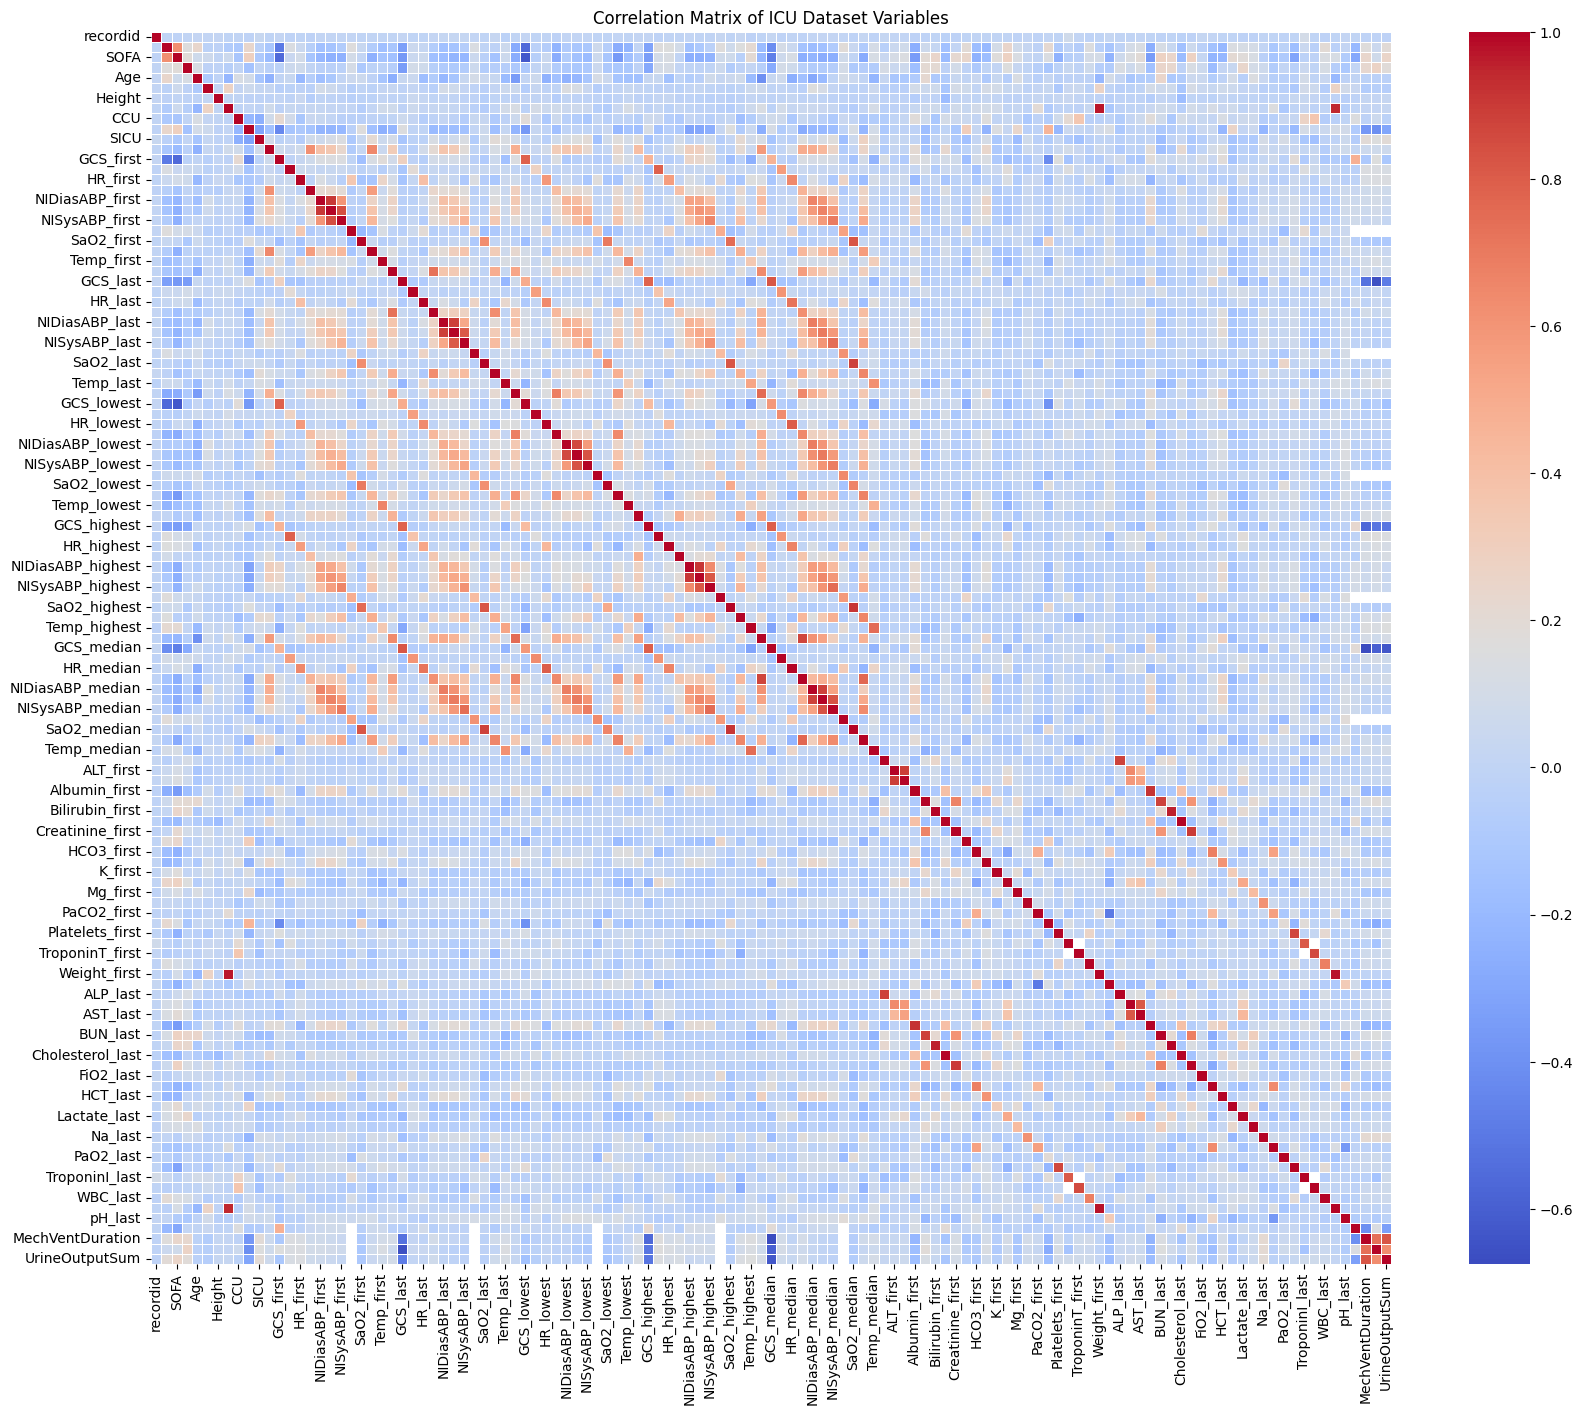

In [4]:
# 2. Find correlations between variables
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of ICU Dataset Variables')
plt.show()

In [5]:
# Find and print highly correlated pairs
print("Highly correlated attributes (correlation > 0.7 or < -0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]:<20} | {correlation_matrix.columns[j]:<20} | {correlation_matrix.iloc[i, j]:.2f}")


Highly correlated attributes (correlation > 0.7 or < -0.7):
NIMAP_first          | NIDiasABP_first      | 0.91
NISysABP_first       | NIMAP_first          | 0.84
MAP_last             | DiasABP_last         | 0.73
NIMAP_last           | NIDiasABP_last       | 0.88
NISysABP_last        | NIMAP_last           | 0.81
GCS_lowest           | GCS_first            | 0.79
NIMAP_lowest         | NIDiasABP_lowest     | 0.86
NISysABP_lowest      | NIMAP_lowest         | 0.83
GCS_highest          | GCS_last             | 0.78
Glucose_highest      | Glucose_first        | 0.79
NIMAP_highest        | NIDiasABP_highest    | 0.91
NISysABP_highest     | NIMAP_highest        | 0.82
SaO2_highest         | SaO2_first           | 0.75
SaO2_highest         | SaO2_last            | 0.82
DiasABP_median       | DiasABP_lowest       | 0.76
GCS_median           | GCS_last             | 0.82
GCS_median           | GCS_highest          | 0.79
HR_median            | HR_last              | 0.72
HR_median            |

In [6]:
# --- Step 3: Remove Highly Correlated Variables ---
# Based on the analysis above, we will remove variables to reduce redundancy (multicollinearity).
# The strategy is to keep the most clinically relevant or fundamental variable in a correlated group.

# Define the list of columns to remove based on our rules:
# - Drop MAP/NIMAP in favor of Systolic/Diastolic.
# - Drop median/last summary stats in favor of first/lowest/highest.
# - Drop AST in favor of the more liver-specific ALT.
# - Drop redundant Weight columns.
# - Drop '_last' lab values in favor of '_first' (baseline).
# - Drop redundant ventilation metric.

columns_to_drop = [
    # Redundant Blood Pressure (keeping Systolic/Diastolic)
    'NIMAP_first', 'MAP_last', 'NIMAP_last', 'NIMAP_lowest', 'NIMAP_highest', 'MAP_median', 'NIMAP_median',
    'SysABP_median', # Correlated with MAP_median

    # Redundant Summary Statistics (keeping _first, _lowest, _highest)
    'GCS_last', 'GCS_median',
    'SaO2_last', 'SaO2_median',
    'DiasABP_median',
    'HR_last', 'HR_median',
    'NISysABP_median',
    'Temp_median', # from 'Temp_median' vs 'Temp_highest'

    # Redundant Clinical Concepts
    'AST_first', 'AST_last', # Keeping ALT
    'Weight', 'Weight_last', # Keeping Weight_first

    # Redundant Lab Tests (keeping _first)
    'ALP_last',
    'Albumin_last',
    'BUN_last',
    'Bilirubin_last',
    'Cholesterol_last', # Also has 1.0 correlation
    'Creatinine_last',
    'Platelets_last',
    'TroponinI_last',
    'TroponinT_last',

    # Redundant Ventilation
    'MechVentLast8Hour', # Keeping MechVentDuration
]

# Remove duplicates from the list
columns_to_drop = sorted(list(set(columns_to_drop)))

# Make sure the dataframe 'df' is available from previous cells
if 'df' in locals() or 'df' in globals():
    # Drop the columns
    df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

    print("Based on clinical significance and high correlation, the following variables have been removed:")
    for col in columns_to_drop:
        print(f"- {col}")

    print(f"Original number of columns: {df.shape[1]}")
    print(f"Number of columns removed: {len(columns_to_drop)}")
    print(f"New number of columns: {df_cleaned.shape[1]}")

    # Display the first few rows of the cleaned dataframe
    # df_cleaned.head() # This will be the output of the cell
else:
    print("DataFrame 'df' not found. Please run the cell that loads the data first.")

Based on clinical significance and high correlation, the following variables have been removed:
- ALP_last
- AST_first
- AST_last
- Albumin_last
- BUN_last
- Bilirubin_last
- Cholesterol_last
- Creatinine_last
- DiasABP_median
- GCS_last
- GCS_median
- HR_last
- HR_median
- MAP_last
- MAP_median
- MechVentLast8Hour
- NIMAP_first
- NIMAP_highest
- NIMAP_last
- NIMAP_lowest
- NIMAP_median
- NISysABP_median
- Platelets_last
- SaO2_last
- SaO2_median
- SysABP_median
- Temp_median
- TroponinI_last
- TroponinT_last
- Weight
- Weight_last
Original number of columns: 121
Number of columns removed: 31
New number of columns: 90


In [7]:
def remove_high_missing_cols(df, threshold=50):
    """
    Remove columns with missing values above threshold percentage.
    Returns the cleaned dataframe.
    """
    total = len(df)
    cols_to_drop = []
    
    for col in df.columns:
        missing = df[col].isnull().sum()
        pct = (missing / total * 100)
        if pct > threshold:
            cols_to_drop.append(col)
    
    return df.drop(columns=cols_to_drop)

In [8]:
# Calculate missing values for each column
total = len(df_cleaned)
results = []
for col in df_cleaned.columns:
    missing = df_cleaned[col].isnull().sum()
    pct = (missing / total * 100)
    results.append((col, missing, pct))

# Sort by percentage descending
results.sort(key=lambda x: x[2], reverse=True)

print(f'Total rows: {total}\n')
for col, missing, pct in results:
    print(f'{col}: {missing} ({pct:.2f}%)')

# Count columns with >50% missing
cols_over_50 = [r for r in results if r[2] > 50]
total_cols = len(results)
print(f'\n--- SUMMARY ---')
print(f'Total columns: {total_cols}')
print(f'Columns with >50% missing: {len(cols_over_50)} ({len(cols_over_50)/total_cols*100:.2f}%)')

# Remove columns with >50% missing
df_cleaned_noNANs = remove_high_missing_cols(df_cleaned)
print(f'\nRemaining columns after removal: {len(df_cleaned_noNANs.columns)}')

Total rows: 6000

TroponinI_first: 5715 (95.25%)
Cholesterol_first: 5528 (92.13%)
TroponinT_first: 4666 (77.77%)
RespRate_first: 4302 (71.70%)
RespRate_last: 4302 (71.70%)
RespRate_lowest: 4302 (71.70%)
RespRate_highest: 4302 (71.70%)
RespRate_median: 4302 (71.70%)
Albumin_first: 3582 (59.70%)
ALP_first: 3479 (57.98%)
Bilirubin_first: 3430 (57.17%)
ALT_first: 3429 (57.15%)
ALT_last: 3429 (57.15%)
SaO2_first: 3353 (55.88%)
SaO2_lowest: 3353 (55.88%)
SaO2_highest: 3353 (55.88%)
Height: 2886 (48.10%)
Lactate_first: 2745 (45.75%)
Lactate_last: 2745 (45.75%)
MechVentStartTime: 2256 (37.60%)
MechVentDuration: 2256 (37.60%)
UrineOutputSum: 2256 (37.60%)
FiO2_first: 1976 (32.93%)
FiO2_last: 1976 (32.93%)
Weight_first: 1951 (32.52%)
DiasABP_first: 1872 (31.20%)
DiasABP_last: 1872 (31.20%)
DiasABP_lowest: 1872 (31.20%)
DiasABP_highest: 1872 (31.20%)
SysABP_first: 1871 (31.18%)
SysABP_last: 1871 (31.18%)
SysABP_lowest: 1871 (31.18%)
SysABP_highest: 1871 (31.18%)
MAP_first: 1854 (30.90%)
MAP_lowes